In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np  # linear algebra
import pandas as pd  # data processing

from sklearn.decomposition import PCA, IncrementalPCA
from umap import UMAP
from sklearn.mixture import GaussianMixture

# hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

<IPython.core.display.Javascript object>

In [9]:
df = pd.read_csv("data/Country-data.csv")

<IPython.core.display.Javascript object>

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<IPython.core.display.Javascript object>

Convert exports, health, and imports to be there portion of the GDP.

In [10]:
df.exports = df.exports * df.gdpp / 100
df.imports = df.imports * df.gdpp / 100
df.health = df.health * df.gdpp / 100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<IPython.core.display.Javascript object>

In [12]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<IPython.core.display.Javascript object>

In [14]:
print(f"There are {len(df[df.duplicated()])} duplicates in the data")

There are 0 duplicates in the data


<IPython.core.display.Javascript object>

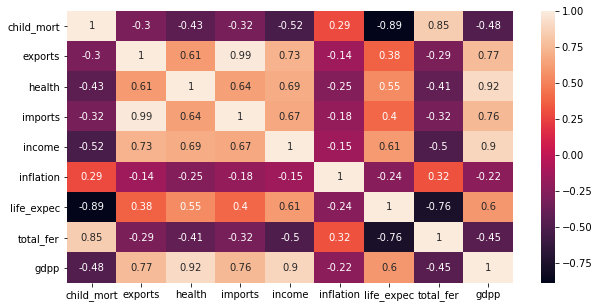

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

 * high correlation between and exports, imports, heatlh and gdpp
 * total_fer is negatively correlated with life_expectancy and positively correlated with child_mort
 * child_mort is negatively correlated with life_expec
 

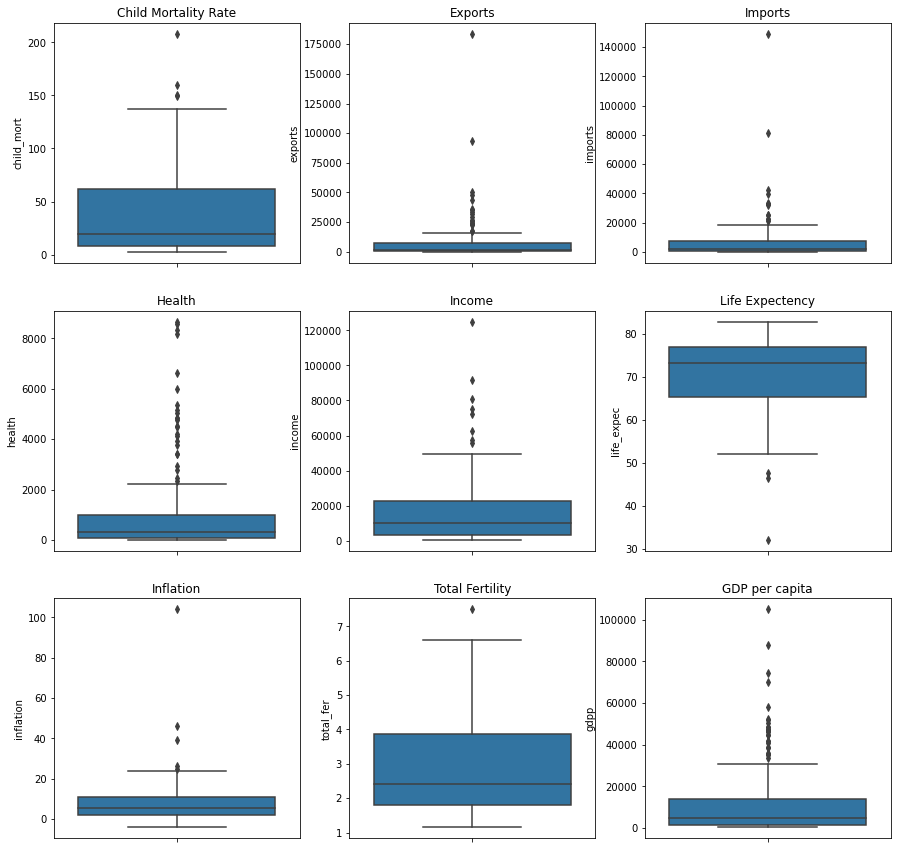

<IPython.core.display.Javascript object>

In [19]:
f, axes = plt.subplots(3, 3, figsize=(15, 15))
sns.boxplot(y=df.child_mort, ax=axes[0, 0])
axes[0, 0].set_title("Child Mortality Rate")
sns.boxplot(y=df.exports, ax=axes[0, 1])
axes[0, 1].set_title("Exports")
sns.boxplot(y=df.imports, ax=axes[0, 2])
axes[0, 2].set_title("Imports")
sns.boxplot(y=df.health, ax=axes[1, 0])
axes[1, 0].set_title("Health")
sns.boxplot(y=df.income, ax=axes[1, 1])
axes[1, 1].set_title("Income")
sns.boxplot(y=df.life_expec, ax=axes[1, 2])
axes[1, 2].set_title("Life Expectency")
sns.boxplot(y=df.inflation, ax=axes[2, 0])
axes[2, 0].set_title("Inflation")
sns.boxplot(y=df.total_fer, ax=axes[2, 1])
axes[2, 1].set_title("Total Fertility")
sns.boxplot(y=df.gdpp, ax=axes[2, 2])
axes[2, 2].set_title("GDP per capita")
plt.show()

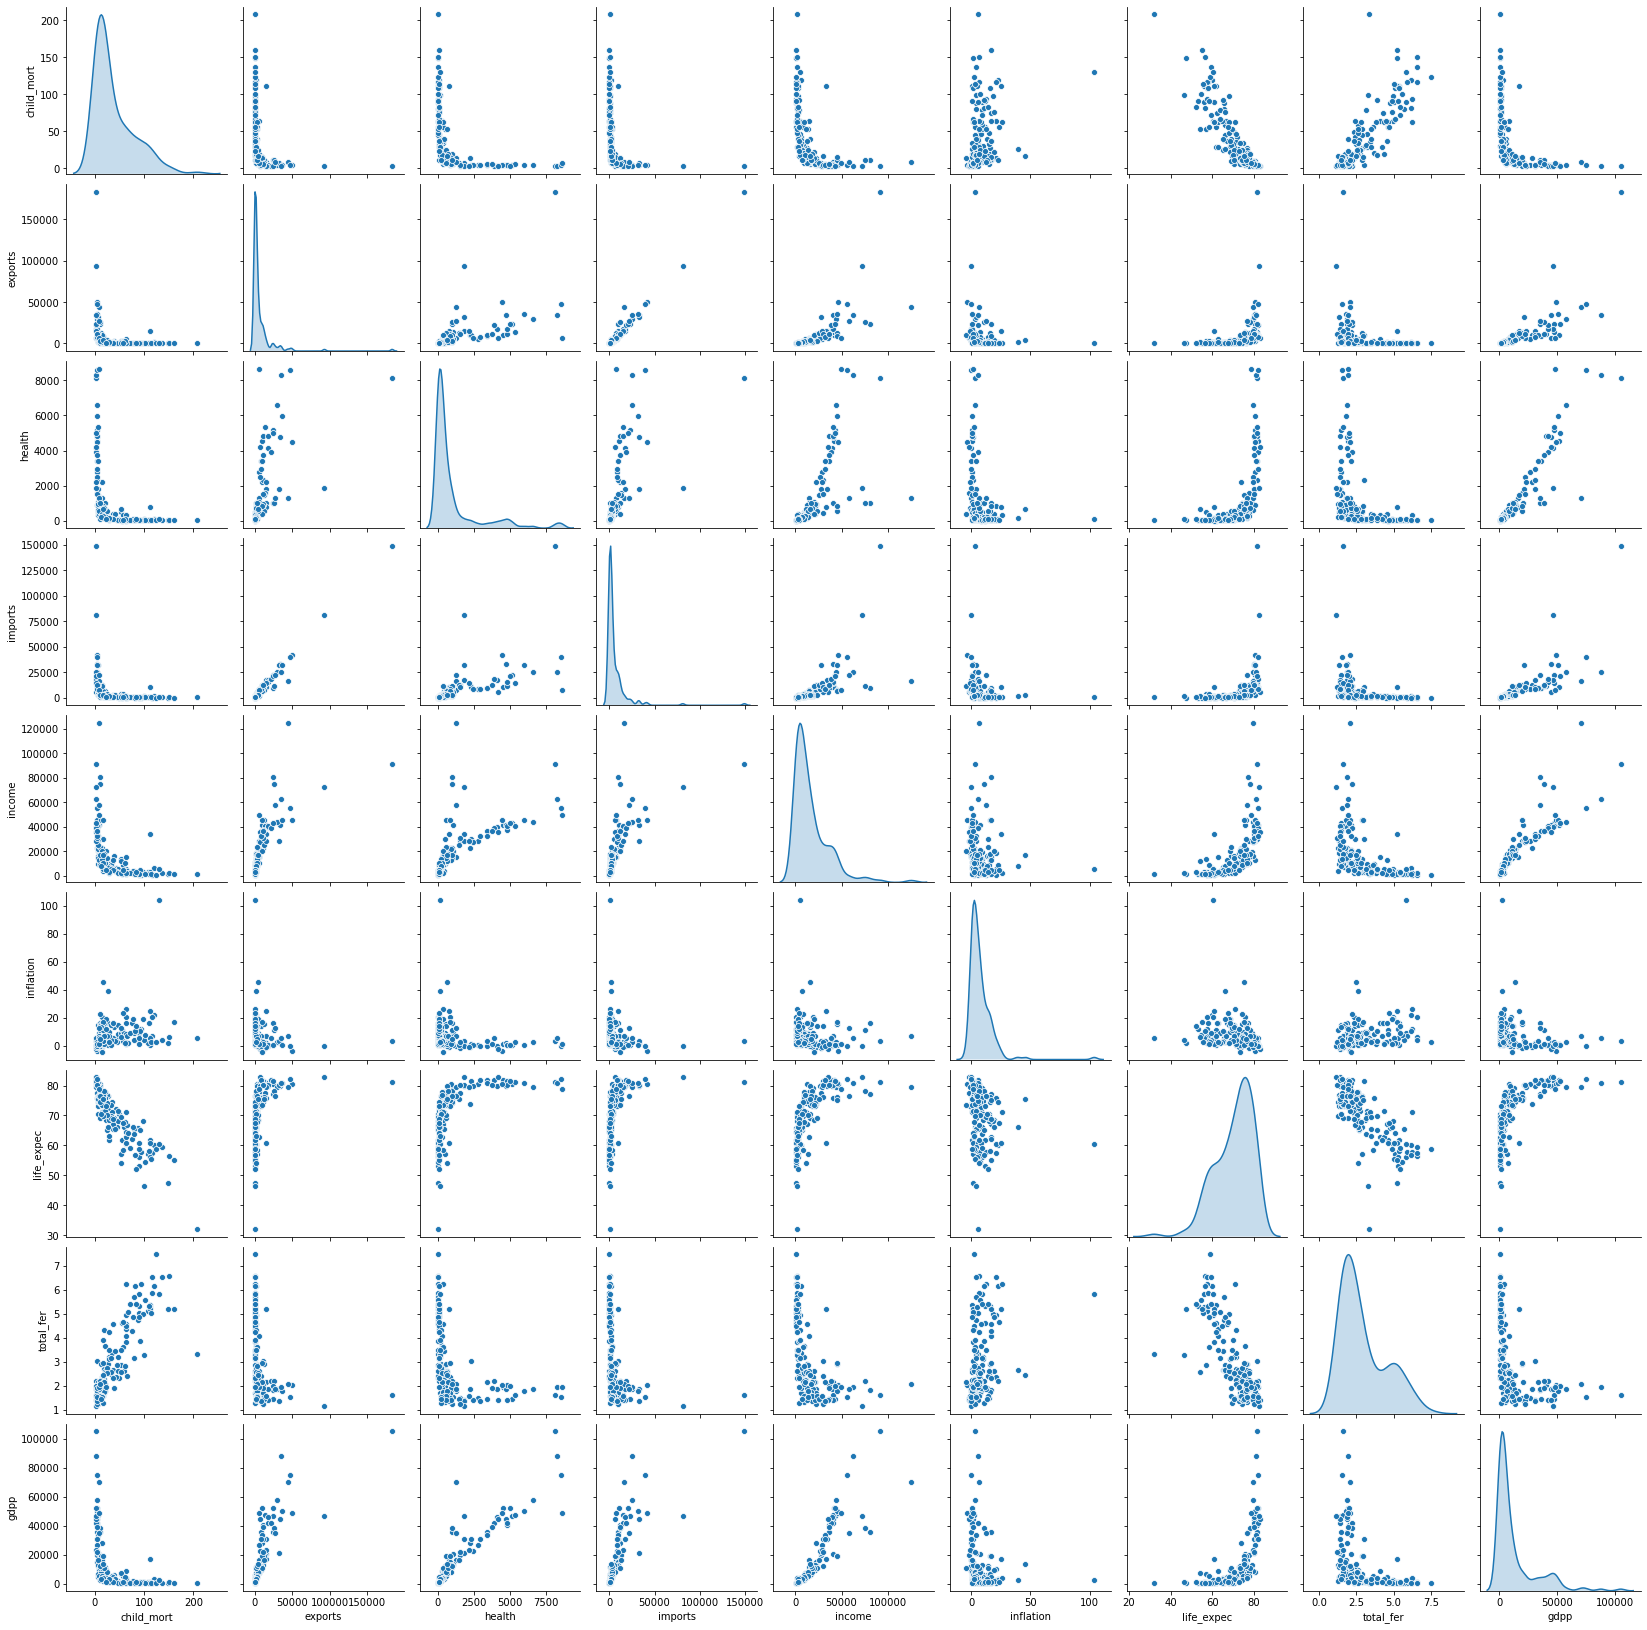

<IPython.core.display.Javascript object>

In [20]:
sns.pairplot(df, diag_kind="kde")
plt.show()

In [21]:
features = df.drop(columns=["country"])

<IPython.core.display.Javascript object>

In [24]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

<IPython.core.display.Javascript object>

In [27]:
pca = PCA(svd_solver="randomized", random_state=1234)
pca.fit(scaled)
print("{} pca components".format(pca.n_components_))

9 pca components


<IPython.core.display.Javascript object>

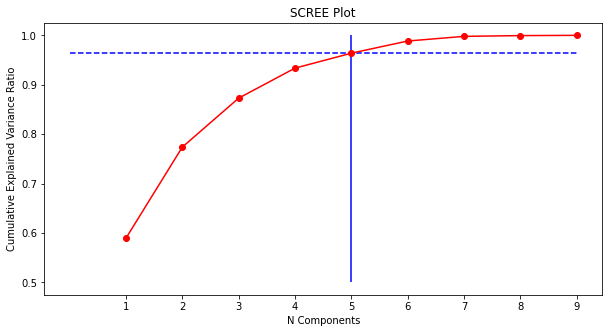

<IPython.core.display.Javascript object>

In [30]:
%matplotlib inline
comp = range(1, pca.n_components_ + 1)

fig = plt.figure(figsize=(10, 5))
plt.plot(comp, np.cumsum(pca.explained_variance_ratio_), marker="o", color="r")
plt.title("SCREE Plot")
plt.xlabel("N Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.vlines(x=5, ymax=1, ymin=0.5, colors="b", linestyles="-")
plt.hlines(
    y=pca.explained_variance_ratio_.cumsum()[4],
    xmax=9,
    xmin=0,
    colors="b",
    linestyles="--"
)
plt.xticks(comp)
plt.show()

About 96% of the data's variance is explained with 5 principle components

In [31]:
# creating dataframe of first 5 PCA Components
colnames = list(features.columns)
pca_data = pd.DataFrame(
    {
        "Features": colnames,
        "PC1": pca.components_[0],
        "PC2": pca.components_[1],
        "PC3": pca.components_[2],
        "PC4": pca.components_[3],
        "PC5": pca.components_[4],
    }
)
pca_data

,Features,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


<IPython.core.display.Javascript object>

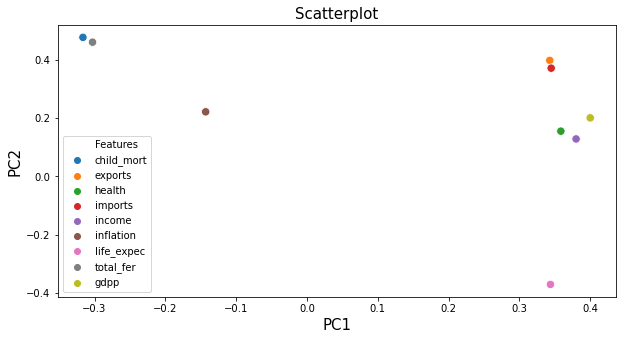

<IPython.core.display.Javascript object>

In [32]:
%matplotlib inline
fig = plt.figure(figsize=(10, 5))
sns.scatterplot(pca_data.PC1, pca_data.PC2, hue=pca_data.Features, marker="o", s=70)
plt.title("Scatterplot", fontsize=15)
plt.xlabel("PC1", fontsize=15)
plt.ylabel("PC2", fontsize=15)
plt.show()

In [56]:
ipca = IncrementalPCA(n_components=5)
ipca = ipca.fit_transform(scaled)
ipcat = np.transpose(ipca)
pca_data = pd.DataFrame()
for i in range(5):
    new_df = pd.DataFrame({"PC{}".format(i + 1): ipcat[i]})
    pca_data = pd.concat([pca_data, new_df], axis=1)
pca_data

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,-1.802840,0.584669,1.179551,0.051510,-0.274608


<IPython.core.display.Javascript object>

In [36]:
k = range(1, 10)
ssd = []
for i in k:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(pca_data)
    ssd.append(kmeans.inertia_)

<Figure size 720x360 with 0 Axes>

<IPython.core.display.Javascript object>

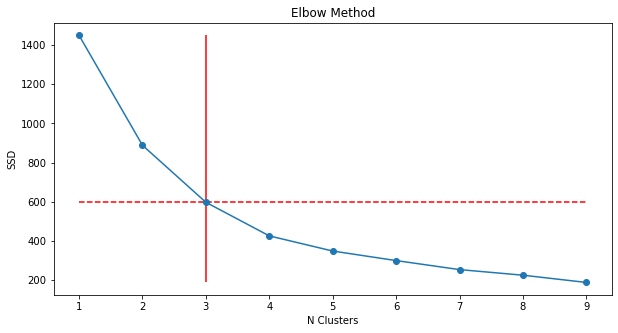

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(k, ssd, marker="o")
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")
plt.title("Elbow Method")
plt.xlabel("N Clusters")
plt.ylabel("SSD")
plt.show()

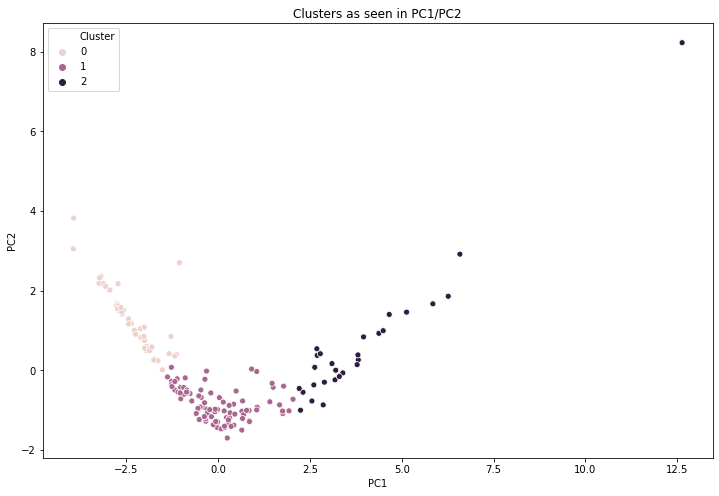

<IPython.core.display.Javascript object>

In [107]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(pca_data)
pca_data["Cluster"] = kmeans.labels_
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=pca_data)
plt.title("Clusters as seen in PC1/PC2")
plt.show()

In [110]:
final_df = pd.merge(df, pca_data.loc[:, "Cluster"], left_index=True, right_index=True)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


<IPython.core.display.Javascript object>

In [98]:
# calculating mean of the required columns(child_mort, income, gdpp) for comparison
Cluster_GDPP = pd.DataFrame(final_df.groupby(["Cluster"]).gdpp.mean())
Cluster_child_mort = pd.DataFrame(final_df.groupby(["Cluster"]).child_mort.mean())
Cluster_income = pd.DataFrame(final_df.groupby(["Cluster"]).income.mean())
kmeans_df = pd.concat([Cluster_GDPP, Cluster_child_mort, Cluster_income], axis=1)
kmeans_df

,gdpp,child_mort,income
Cluster,,,
0,48114.285714,5.046429,50178.571429
1,1909.208333,91.610417,3897.354167
2,7979.912088,20.357143,13968.021978


<IPython.core.display.Javascript object>

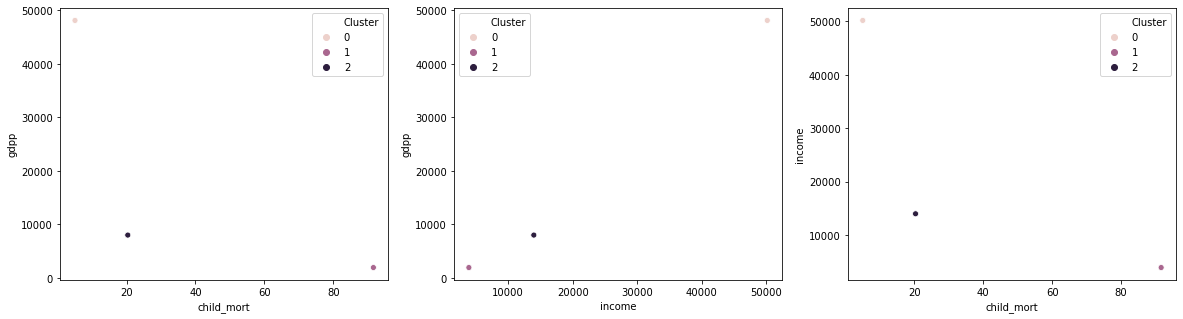

<IPython.core.display.Javascript object>

In [46]:
f, axes = plt.subplots(1,3,figsize=(20,5))
sns.scatterplot(x='child_mort', y='gdpp', hue=kmeans_df.index, data=kmeans_df, ax = axes[0])
sns.scatterplot(x='income', y='gdpp', hue=kmeans_df.index, data=kmeans_df, ax = axes[1])
sns.scatterplot(x='child_mort', y='income', hue=kmeans_df.index, data=kmeans_df, ax = axes[2])
plt.show()


* High gdpp and low child mortality characterizes a Developing country
* Low gdpp and low child mortality characterizes a Developed country
* Low gdpp and high chil mortality characterizes an Under-Developed country

In [49]:
kmeans_df.rename(index={0: 'Developing'}, inplace=True)
kmeans_df.rename(index={1: 'Developed'}, inplace=True)
kmeans_df.rename(index={2: 'Under-Developed'}, inplace=True)


<IPython.core.display.Javascript object>

In [63]:
for i, cluster in enumerate(final_df.Cluster):
    if cluster == 0:
        final_df.loc[i, "Clustered Countries"] = "Developing"
    elif cluster == 1:
        final_df.loc[i, "Clustered Countries"] = "Developed"
    else:
        final_df.loc[i, "Clustered Countries"] = "Under-Developed"

<IPython.core.display.Javascript object>

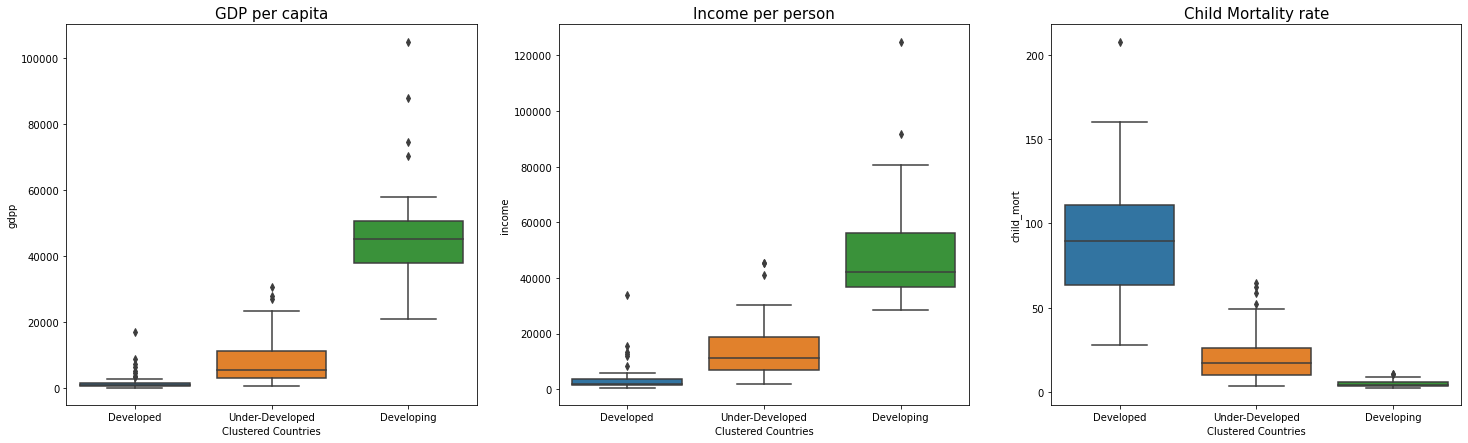

<IPython.core.display.Javascript object>

In [65]:
f, axes = plt.subplots(1, 3, figsize=(25, 7))
sns.boxplot(x="Clustered Countries", y="gdpp", data=final_df, ax=axes[0])
axes[0].set_title("GDP per capita", fontsize=15)
sns.boxplot(x="Clustered Countries", y="income", data=final_df, ax=axes[1])
axes[1].set_title("Income per person", fontsize=15)
sns.boxplot(x="Clustered Countries", y="child_mort", data=final_df, ax=axes[2])
axes[2].set_title("Child Mortality rate", fontsize=15)
plt.show()

In [75]:
umap = UMAP(n_components=5)
umap = umap.fit_transform(scaled)
umapt = np.transpose(ipca)
umap_data = pd.DataFrame()
new_df = pd.DataFrame()
for i in range(5):
    new_df = pd.DataFrame({"C{}".format(i + 1): umapt[i]})
    umap_data = pd.concat([umap_data, new_df], axis=1)
umap_data

,C1,C2,C3,C4,C5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087
...,...,...,...,...,...
162,-1.175606,-0.281249,-0.663619,-0.258950,-0.133251
163,-0.314505,-0.019143,3.680854,0.016772,-0.475066
164,-0.594560,-1.084130,0.528668,-0.478067,-0.373132
165,-1.802840,0.584669,1.179551,0.051510,-0.274608


<IPython.core.display.Javascript object>

In [77]:
k = range(1, 10)
ssd = []
for i in k:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(umap_data)
    ssd.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

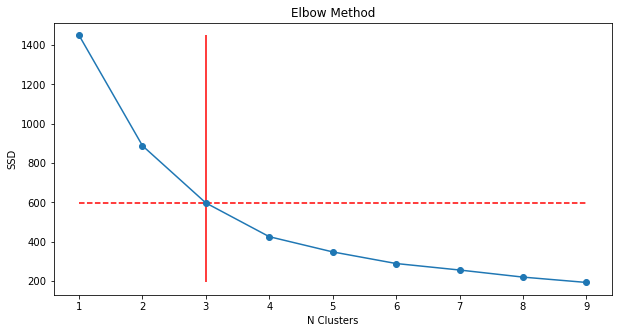

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(10, 5))
plt.plot(k, ssd, marker="o")
plt.vlines(x=3, ymax=ssd[-1], ymin=ssd[0], colors="r", linestyles="-")
plt.hlines(y=ssd[2], xmax=9, xmin=1, colors="r", linestyles="--")
plt.title("Elbow Method")
plt.xlabel("N Clusters")
plt.ylabel("SSD")
plt.show()

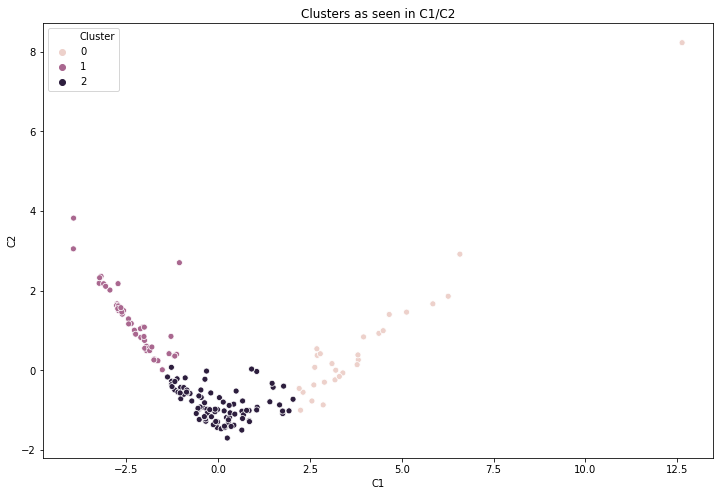

<IPython.core.display.Javascript object>

In [79]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(umap_data)
umap_data["Cluster"] = kmeans.labels_
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(x="C1", y="C2", hue="Cluster", data=umap_data)
plt.title("Clusters as seen in C1/C2")
plt.show()

As we can see, umap produces the same results here.

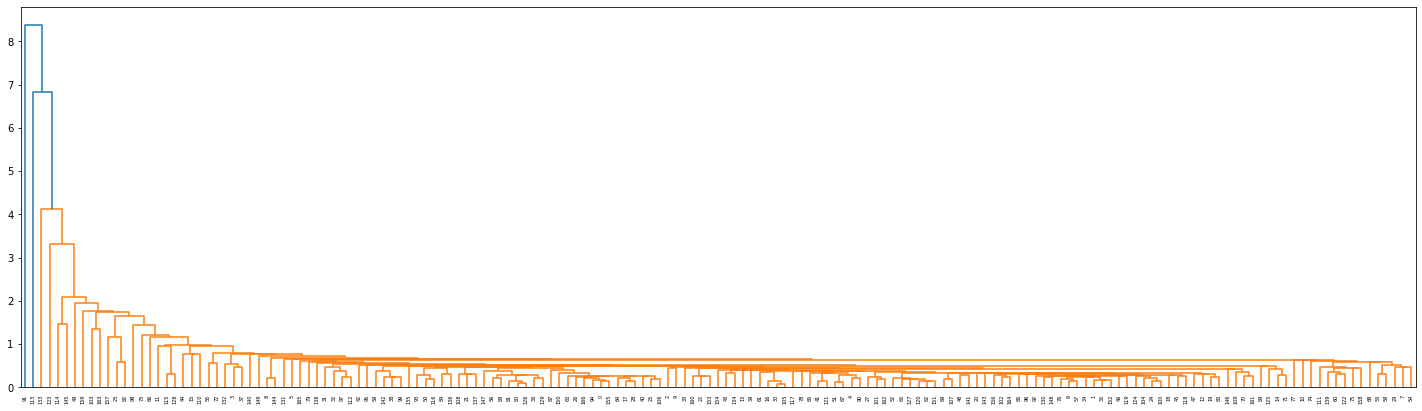

<IPython.core.display.Javascript object>

In [102]:
mergings = linkage(pca_data.iloc[:, :5], method="single", metric="euclidean")
plt.figure(figsize=(25, 7))
dn = dendrogram(mergings)

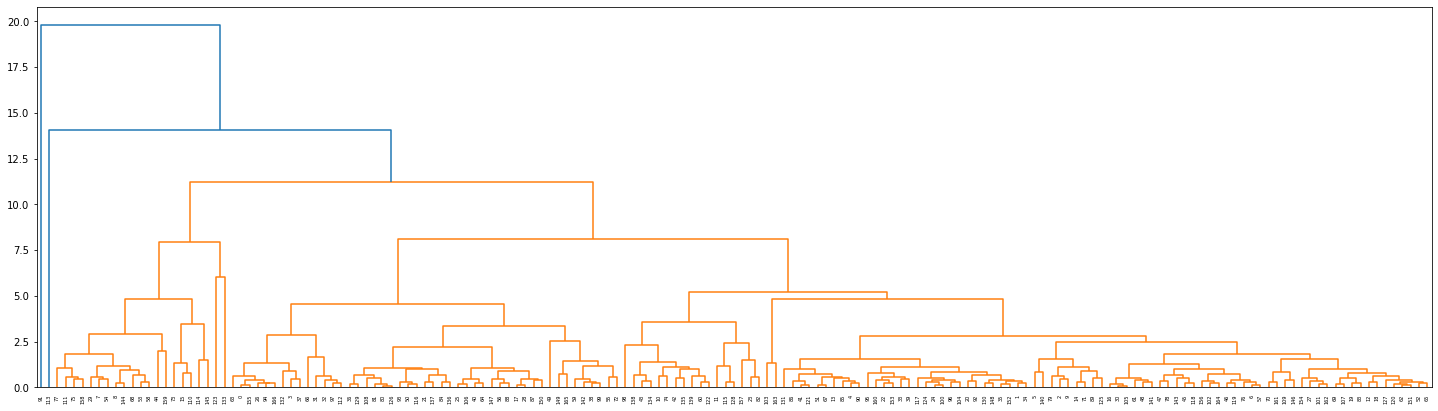

<IPython.core.display.Javascript object>

In [103]:
mergings = linkage(pca_data.iloc[:, :5], method="complete", metric="euclidean")
plt.figure(figsize=(25, 7))
dn = dendrogram(mergings)

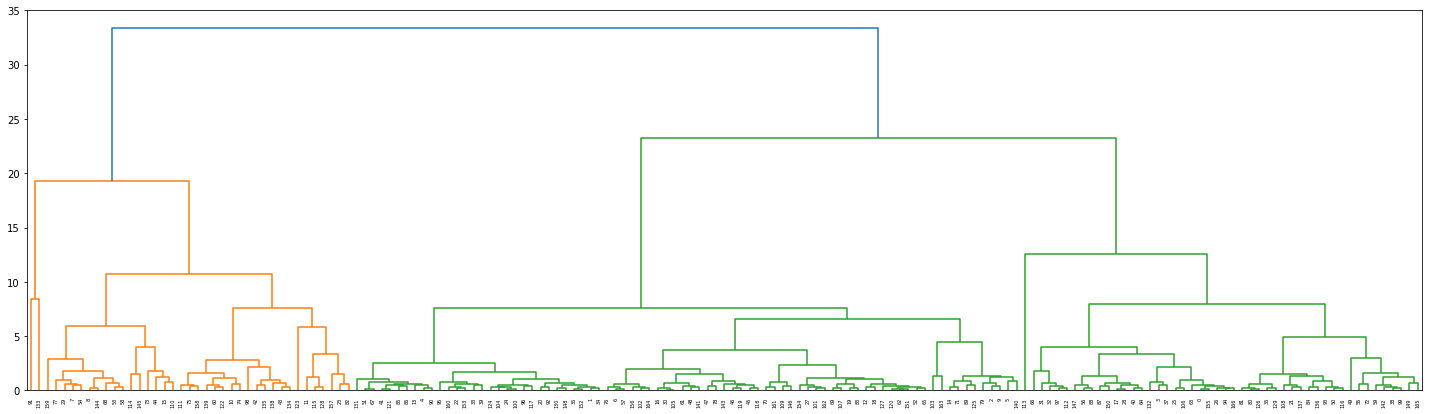

<IPython.core.display.Javascript object>

In [104]:
mergings = linkage(pca_data.iloc[:, :5], method="ward", metric="euclidean")
plt.figure(figsize=(25, 7))
dn = dendrogram(mergings)

In [111]:
h_clusters = cut_tree(mergings, n_clusters=3)
pca_data["H_Cluster"] = h_clusters.reshape(-1)
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,H_Cluster,Cluster
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1,1


<IPython.core.display.Javascript object>

In [112]:
display(pca_data["Cluster"].value_counts())
pca_data["H_Cluster"].value_counts()

1    91
0    48
2    28
Name: Cluster, dtype: int64

1    80
0    48
2    39
Name: H_Cluster, dtype: int64

<IPython.core.display.Javascript object>

It appears as though both heirarchical clustering by 'ward' method produces similar membership grouping as the kmeans method.

In [113]:
final_df = pd.merge(
    final_df, pca_data.loc[:, "H_Cluster"], left_index=True, right_index=True
)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,H_Cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,1


<IPython.core.display.Javascript object>

In [122]:
Cluster_GDPP_H = pd.DataFrame(final_df.groupby(["H_Cluster"]).gdpp.mean())
Cluster_child_mort_H = pd.DataFrame(final_df.groupby(["H_Cluster"]).child_mort.mean())
Cluster_income_H = pd.DataFrame(final_df.groupby(["H_Cluster"]).income.mean())
H_mean_df = pd.concat([Cluster_GDPP_H, Cluster_child_mort_H, Cluster_income_H], axis=1)
H_mean_df

,gdpp,child_mort,income
H_Cluster,,,
0,1909.208333,91.610417,3897.354167
1,5962.150000,22.157500,11478.625000
2,40933.333333,5.671795,45071.794872


<IPython.core.display.Javascript object>

In [123]:
kmeans_df

,gdpp,child_mort,income
Cluster,,,
0,48114.285714,5.046429,50178.571429
1,1909.208333,91.610417,3897.354167
2,7979.912088,20.357143,13968.021978


<IPython.core.display.Javascript object>

We can see in this data set that UMAP and PCA perform just as well as one another, and k-means clustering and heirarchical cluster with the 'ward' method produces similar results.

For this dataset, I would stick with PCA and K-Means for dimension reduction and clustering. This decision is made with the consideration of performance, interpretability and efficiency.  

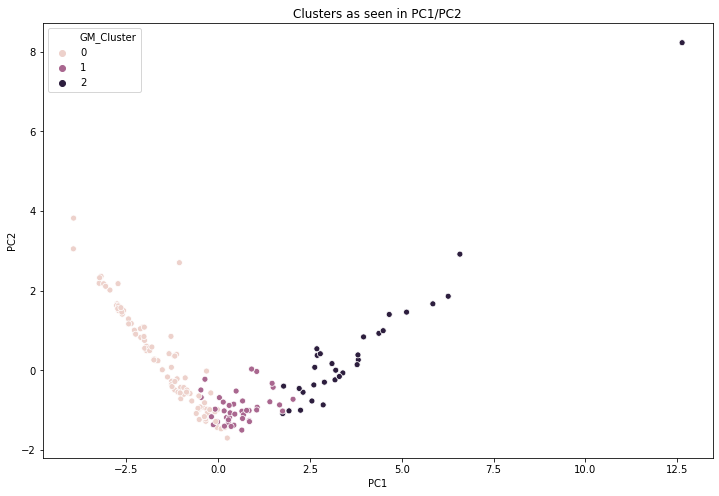

<IPython.core.display.Javascript object>

In [118]:
gmm = GaussianMixture(n_components = 3)
gmm = gmm.fit_predict(pca_data.iloc[:,:5])
pca_data["GM_Cluster"] = gmm
fig = plt.figure(figsize=(12, 8))
sns.scatterplot(x="PC1", y="PC2", hue="GM_Cluster", data=pca_data)
plt.title("Clusters as seen in PC1/PC2")
plt.show()


In [119]:
final_df = pd.merge(
    final_df, pca_data.loc[:, "GM_Cluster"], left_index=True, right_index=True
)
final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster,H_Cluster,GM_Cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,1,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,1,1


<IPython.core.display.Javascript object>

In [120]:
final_df["GM_Cluster"].value_counts()

0    94
1    42
2    31
Name: GM_Cluster, dtype: int64

<IPython.core.display.Javascript object>

In [121]:
Cluster_GDPP_H = pd.DataFrame(final_df.groupby(["GM_Cluster"]).gdpp.mean())
Cluster_child_mort_H = pd.DataFrame(final_df.groupby(["GM_Cluster"]).child_mort.mean())
Cluster_income_H = pd.DataFrame(final_df.groupby(["GM_Cluster"]).income.mean())
GM_mean_df = pd.concat([Cluster_GDPP_H, Cluster_child_mort_H, Cluster_income_H], axis=1)
GM_mean_df

,gdpp,child_mort,income
GM_Cluster,,,
0,2683.446809,60.473404,5578.861702
1,11561.190476,13.164286,20196.428571
2,46038.709677,4.958065,48080.645161


<IPython.core.display.Javascript object>

It appears that the GMM model has a similar clustering as the other models, but the membership is slightly different and the means for the features in the clusters are less extreme than in the heirarchical or kmeans.